In [ ]:
from music21 import *
import itertools
import random

import scipy.io.wavfile as wave
from IPython.display import Audio
def play(stream):
    midi.realtime.StreamPlayer(stream).play()

# Melancholy

## General approach

The feeling of melancholy often comes from minor scales and therefore minor chord progressions. 
While many chord progressions help in bringing that melancholic feel, we decided to use the standard II-V-I jazz progression as a basis. 
Therefore, we will leave very little variation for harmonic progression, and we will reserve most of the algorithmic composition for the melodic part. 

This decision stems from the inspiration that chords represent the "background noise" of a day, and therefore keeping the same chord structure ensures
the genericity of a dream.

Whilst the chords will remain mostly untouched, we will allow for variations to add "color", by allowing tritone substitions or what is known as [Coltrane changes](https://en.wikipedia.org/wiki/Coltrane_changes#Coltrane_substitution) to add strong contrasting colors throughout the piece. This will bring both tension and (yet to be decided) resolution within the part. 



## Harmonic choices

The original idea, subject to change later, is to use a jazz standard chord sheet, and base ourselves upon this for a more complete and thought-out chord progression of our own. 

Inspirations include, but are not limited to : 

- Autumn Leaves by Joseph Kosma
- Nardis by Bill Evans
- The Two Lonely People by Bill Evans

The idea is to handpick chord patterns to create a mosaique of cohesive progressions that can reflect a palette of approaches to melancholy. 



## Melodic choices

As for melodic composition, we will mostly use three scales: 

- Minor natural

The chord voicings representer hereafter are handpicked to bring the blue-est color. The voicings might change later on, depending on how it renders on non-acoustic instruments, in that case synthesized piano.

## Autumn Leaves

In [ ]:
leaves = stream.Stream()
leaves.append(meter.TimeSignature('4/4'))
leavesC = []
#We're choosing the standard voicing for now, we will change it before the submission
Cmin7=chord.Chord('C Eb G Bb')
leavesC.append(Cmin7)
F7 = chord.Chord('F A C Eb')
leavesC.append(F7)
BbMaj7 = chord.Chord('Bb D F A')
leavesC.append(BbMaj7)
for ch in leavesC:
    leaves.append(ch)
    


## Nardis

In [ ]:
nardis = stream.Stream()
nardis.append(meter.TimeSignature('4/4'))
#Standard voicings here too
Emin7 = chord.Chord('E G B D', quarterLength = 4)
Fmaj7 = chord.Chord('F A C E', quarterLength = 4)
B7 = chord.Chord('B D# F# A', quarterLength = 4)
Cmaj7 = chord.Chord('C E G B', quarterLength = 4)
Amin7 = chord.Chord('A C E G', quarterLength = 4)
Dmin7 = chord.Chord('D F A C', quarterLength = 4)
G7 = chord.Chord('G B D F', quarterLength = 4)
Emaj7= chord.Chord('E G# B D#', quarterLength = 4)
nardisC = [Emin7, Fmaj7, B7, Cmaj7, Amin7, Fmaj7, Emaj7, Emin7, #A
           Emin7, Fmaj7, B7, Cmaj7, Amin7, Fmaj7, Emaj7, Emin7, #A
           Amin7, Fmaj7, Amin7, Fmaj7, Dmin7, G7, Cmaj7, Fmaj7, #B
           Emin7, Fmaj7, B7, Cmaj7, Amin7, Fmaj7, Emaj7, Emin7] #A

for i in range(0, 24):
    m=stream.Measure(i)
    m.append(nardisC[i])
    nardis.append(m)



In [8]:
#The idea here is to use a fraction to determine how deep we are into the piece, and the determine how fast our tempo should be. 
#The reference is the middle of the piece, at which point we choose the fastest possible tempo. We use linear scaling.

def tempo_alg(frac, lowTempo, highTempo):
    if frac<0 or frac>1:
        return 0
    if frac<0.5:
        return lowTempo + 2*frac*(highTempo - lowTempo)
    if frac>=0.5 :
        return float(2*highTempo - lowTempo +2*frac*(lowTempo - highTempo))
    
#useless
    

In [9]:




def csp_chooser(trans, leavesa):
    init_state = leavesa
    chain_length = 4
    piece = []
    for _ in range(chain_length):
        piece.append(init_state)
        next_states, probs = trans[init_state]
        init_state = random.choices(next_states, probs)[0]
    return piece


In [10]:





#Extra chords for the C CSP, some need to be redefined because shorter length
Em72 = chord.Chord('E G B D', quarterLength = 2)
Ebm7 = chord.Chord('D# F# A# C#', quarterLength = 2)
Dm7 = chord.Chord('C D F A', quarterLength = 2)
Dbm7= chord.Chord("C# E G# B", quarterLength = 2)


#B
           Gbm7b5, B7, Em72, Dm7, #C
           Gbm7b5, B7, Em7, Em7]




#nardis.show()
#leavesa.show()
#leavesb.show()

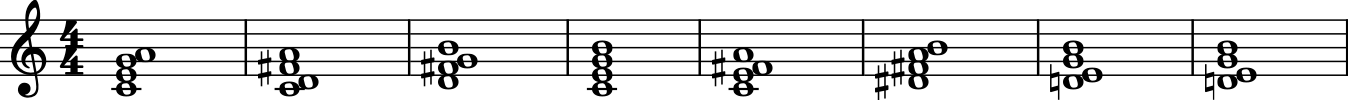

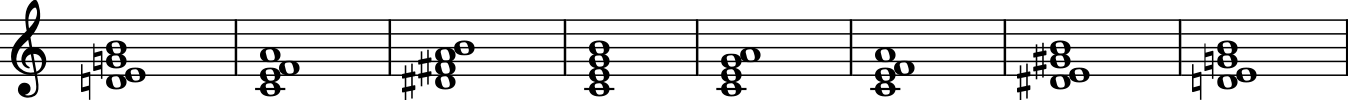

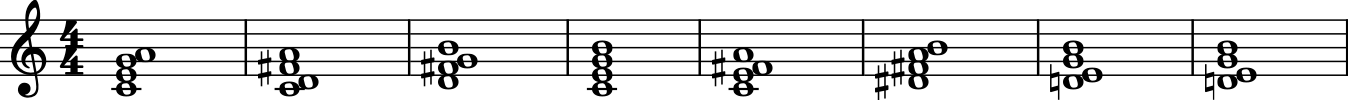

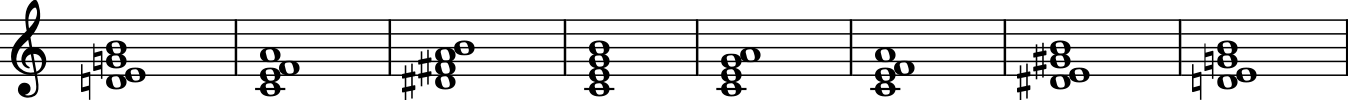

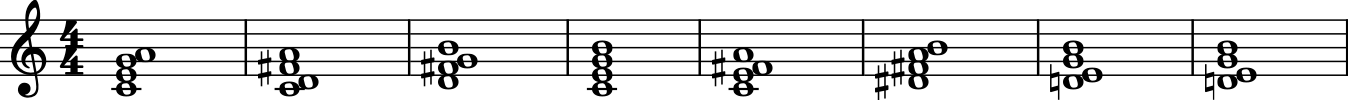

[[1, 3, 5, 6, 4], '|', [7, 7, 6, 4], '|', [5, 6, 1, 3, 2], '|', [5, 5, 4, 2, 3], '|', [1, 3, 5, 6, 4], '|', [6, 5, 4], '|', [1, 3, 5, 6, 5], '|', [5, 5, 4, 2, 3], '|', [8, 8, 7, 5], '|', [7, 7, 6, 4], '|']
['la citation']


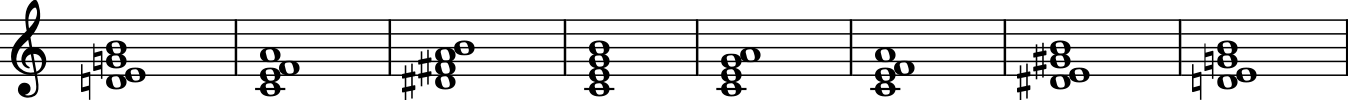

[[6, 5, 4], '|', [1, 3, 5, 6, 5], '|', [7, 7, 6, 4], '|', [6, 5, 4], '|', [5, 5, 4, 2, 3], '|', [5, 5, 4, 2, 3], '|', [5, 6, 1, 3, 2], '|', [1, 3, 5, 6, 4], '|', [5, 6, 1, 3, 2], '|', [6, 5, 4], '|']
['themeN']


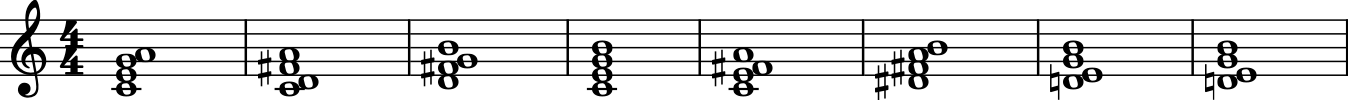

[[7, 7, 6, 4], '|', [6, 5, 4], '|', [7, 7, 6, 4], '|', [5, 6, 1, 3, 2], '|', [8, 8, 7, 5], '|', [6, 5, 4], '|', [7, 7, 6, 4], '|', [7, 7, 6, 4], '|', [5, 6, 1, 3, 2], '|', [1, 3, 5, 6, 4], '|']
['la citation']


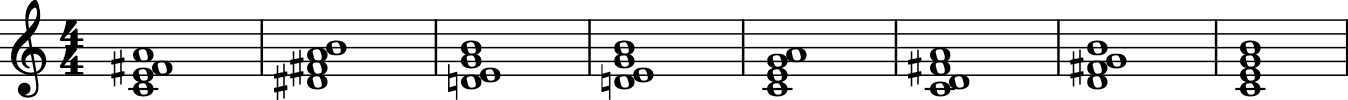

[[1, 3, 5, 6, 5], '|', [7, 7, 6, 4], '|', [8, 8, 7, 5], '|', [5, 5, 4, 2, 3], '|', [1, 3, 5, 6, 4], '|', [1, 3, 5, 6, 4], '|', [5, 6, 1, 3, 2], '|', [1, 3, 5, 6, 4], '|', [1, 3, 5, 6, 4], '|', [6, 5, 4], '|']
['themeB']


In [24]:
phrase_creation(3)

[[1, 3, 5, 6, 4], '|', [5, 6, 1, 3, 2], '|', [6, 5, 4], '|']